In [5]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy
import sys

sys.path.append('../src')
import utils as ut

In [6]:
runs = ['ctrl','totl']


In [7]:
mpl.rcParams['figure.subplot.wspace'] = .3
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (7,5)

btitle = ['a) East Antarctica','b) Ross','d) Amundsen','e) Weddell','f) Peninsula']
alpha = .3
lw = .5
axi = [0,0,1,1,1]
axj = [0,1,0,1,2]

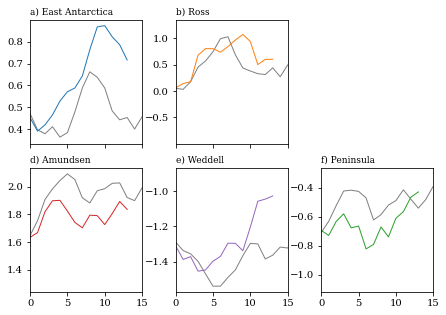

In [8]:
fig,ax = plt.subplots(2,3,sharex=True)

for r,run in enumerate(runs):
    ds = xr.open_dataset(f'../data/temperature_{run}.nc')
    
    for b,bas in enumerate(ds.basin.values):
        dax = ax[axi[b],axj[b]]

        temp = ds.temp.sel(basin=bas)
        if run == 'ctrl':
            dax.plot(ds.time,temp,c='.5',zorder=0)
        else:
            dax.plot(ds.time,temp,c=ut.bcol[bas])
            #dax.scatter(ds.time,temp,5,c=ut.bcol[bas])
        if r==0:
            dax.set_title(btitle[b],loc='left')
            #dax.set_ylim([-2,3])
            dax.set_xlim([0,15])
    ds.close()

            
ax[0,2].set_visible(False)
plt.show()